In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Load the dataset
df = pd.read_csv('NewFactOrder.csv')

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
print(df.shape)
df

(448657, 13)


,OrderNumber,OrderRowNumber,ArticleKey,Colour,ArticleGenre,Size,ArticleGroupName,Collection,SizeGroup,BabyJunior,ArticleMaterial,DateOrderedKey,QuantityOrdered
0,94940600,11,36200,red,SHIRT/BLOUSE,92/98,TOPS,Pre,4[92-98],2 TODDLER,SHIRT LS,20180121.0,1.0
1,94940600,12,12030,Blue,DENIM,92/98,BOTTOMS,Pre,4[92-98],2 TODDLER,NaN,20180121.0,1.0
2,94940600,13,7354,offwhite,TEES LS,92/98,TOPS,Pre,4[92-98],2 TODDLER,RIB,20180121.0,1.0
3,94940800,1,8501,offwhite,DRESSES LS,116/122,DRESSES,Main,6[116-122],3 KIDS,NaN,20180121.0,1.0
4,94940800,2,24256,offwhite,LEGGINGS,104/110,BOTTOMS,Main,5[104-110],3 KIDS,NaN,20180121.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448652,113662400,1,12388,Navy,SWEATPANTS,104/110,BOTTOMS,Main,5[104-110],3 KIDS,TERRY,20201008.0,1.0
448653,113662500,1,31963,Offwhite,TEES SS,104/110,TOPS,Special Collection,5[104-110],3 KIDS,JERSEY,20201008.0,1.0
448654,113662500,2,36812,Brown,DRESSES LS,104/110,DRESSES,Special Collection,5[104-110],3 KIDS,RIB,20201008.0,1.0
448655,113662600,1,36723,Offwhite,DRESSES LS,116/122,DRESSES,Special Collection,6[116-122],3 KIDS,JERSEY,20201008.0,1.0


In [33]:
df['DateOrderedKey'] = pd.to_datetime(df['DateOrderedKey'], format='%Y%m%d')


In [34]:
df

,OrderNumber,OrderRowNumber,ArticleKey,Colour,ArticleGenre,Size,ArticleGroupName,Collection,SizeGroup,BabyJunior,ArticleMaterial,DateOrderedKey,QuantityOrdered
0,94940600,11,36200,red,SHIRT/BLOUSE,92/98,TOPS,Pre,4[92-98],2 TODDLER,SHIRT LS,2018-01-21,1.0
1,94940600,12,12030,Blue,DENIM,92/98,BOTTOMS,Pre,4[92-98],2 TODDLER,NaN,2018-01-21,1.0
2,94940600,13,7354,offwhite,TEES LS,92/98,TOPS,Pre,4[92-98],2 TODDLER,RIB,2018-01-21,1.0
3,94940800,1,8501,offwhite,DRESSES LS,116/122,DRESSES,Main,6[116-122],3 KIDS,NaN,2018-01-21,1.0
4,94940800,2,24256,offwhite,LEGGINGS,104/110,BOTTOMS,Main,5[104-110],3 KIDS,NaN,2018-01-21,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448652,113662400,1,12388,Navy,SWEATPANTS,104/110,BOTTOMS,Main,5[104-110],3 KIDS,TERRY,2020-10-08,1.0
448653,113662500,1,31963,Offwhite,TEES SS,104/110,TOPS,Special Collection,5[104-110],3 KIDS,JERSEY,2020-10-08,1.0
448654,113662500,2,36812,Brown,DRESSES LS,104/110,DRESSES,Special Collection,5[104-110],3 KIDS,RIB,2020-10-08,1.0
448655,113662600,1,36723,Offwhite,DRESSES LS,116/122,DRESSES,Special Collection,6[116-122],3 KIDS,JERSEY,2020-10-08,1.0


In [35]:
df.set_index('DateOrderedKey', inplace=True)

In [36]:
df

,OrderNumber,OrderRowNumber,ArticleKey,Colour,ArticleGenre,Size,ArticleGroupName,Collection,SizeGroup,BabyJunior,ArticleMaterial,QuantityOrdered
DateOrderedKey,,,,,,,,,,,,
2018-01-21,94940600,11,36200,red,SHIRT/BLOUSE,92/98,TOPS,Pre,4[92-98],2 TODDLER,SHIRT LS,1.0
2018-01-21,94940600,12,12030,Blue,DENIM,92/98,BOTTOMS,Pre,4[92-98],2 TODDLER,NaN,1.0
2018-01-21,94940600,13,7354,offwhite,TEES LS,92/98,TOPS,Pre,4[92-98],2 TODDLER,RIB,1.0
2018-01-21,94940800,1,8501,offwhite,DRESSES LS,116/122,DRESSES,Main,6[116-122],3 KIDS,NaN,1.0
2018-01-21,94940800,2,24256,offwhite,LEGGINGS,104/110,BOTTOMS,Main,5[104-110],3 KIDS,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-08,113662400,1,12388,Navy,SWEATPANTS,104/110,BOTTOMS,Main,5[104-110],3 KIDS,TERRY,1.0
2020-10-08,113662500,1,31963,Offwhite,TEES SS,104/110,TOPS,Special Collection,5[104-110],3 KIDS,JERSEY,1.0
2020-10-08,113662500,2,36812,Brown,DRESSES LS,104/110,DRESSES,Special Collection,5[104-110],3 KIDS,RIB,1.0


In [37]:
monthly_df = df.groupby([pd.Grouper(freq='M'), 'ArticleGroupName'])['QuantityOrdered'].sum()

In [38]:
monthly_df

DateOrderedKey  ArticleGroupName
2018-01-31      ACCESSORIES          256.0
                BODY AND ONESIE     1074.0
                BOTTOMS             6144.0
                DRESSES             2958.0
                HATS                1133.0
                                     ...  
2020-10-31      HATS                 105.0
                HOME                  13.0
                OUTERWEAR            268.0
                SWIMWEAR               6.0
                TOPS                1128.0
Name: QuantityOrdered, Length: 379, dtype: float64

In [39]:
monthly_df = df.groupby([pd.Grouper(freq='M'), 'ArticleGroupName'])['QuantityOrdered'].sum().unstack()

In [40]:
monthly_df

ArticleGroupName,ACCESSORIES,BODY AND ONESIE,BOTTOMS,DRESSES,Discount,ECOM return cost,Giftwrapping,HATS,HOME,OUTERWEAR,SWIMWEAR,Shipment,Stuff,TOPS,Övriga intäkter
DateOrderedKey,,,,,,,,,,,,,,,
2018-01-31,256.0,1074.0,6144.0,2958.0,NaN,NaN,NaN,1133.0,82.0,406.0,16.0,2.0,NaN,4973.0,19.0
2018-02-28,283.0,775.0,4118.0,2184.0,NaN,NaN,NaN,1562.0,71.0,383.0,11.0,1.0,NaN,4108.0,1.0
2018-03-31,247.0,402.0,1336.0,513.0,NaN,NaN,NaN,531.0,88.0,612.0,451.0,2.0,66.0,2390.0,22.0
2018-04-30,470.0,242.0,631.0,194.0,NaN,NaN,NaN,504.0,42.0,413.0,220.0,2.0,12.0,1125.0,11.0
2018-05-31,297.0,298.0,1106.0,468.0,NaN,NaN,NaN,831.0,214.0,366.0,244.0,NaN,11.0,2008.0,NaN
2018-06-30,225.0,1000.0,2978.0,1260.0,NaN,NaN,NaN,801.0,133.0,298.0,140.0,1.0,11.0,4786.0,NaN
2018-07-31,305.0,1299.0,3908.0,1994.0,NaN,NaN,NaN,1274.0,79.0,652.0,642.0,NaN,19.0,5944.0,17.0
2018-08-31,595.0,1136.0,3944.0,1823.0,NaN,NaN,NaN,1676.0,110.0,1228.0,320.0,NaN,22.0,5045.0,4.0
2018-09-30,733.0,230.0,761.0,180.0,NaN,1.0,NaN,558.0,3816.0,644.0,38.0,1.0,13.0,1604.0,8.0


In [41]:
for group in monthly_df.columns:
  print(group)

ACCESSORIES
BODY AND ONESIE
BOTTOMS
DRESSES
Discount
ECOM return cost
Giftwrapping
HATS
HOME
OUTERWEAR
SWIMWEAR
Shipment
Stuff
TOPS
Övriga intäkter


In [42]:
monthly_df = df.groupby([pd.Grouper(freq='M'), 'ArticleGroupName'])['QuantityOrdered'].sum().unstack().fillna(0)

In [43]:
monthly_df.columns[[4,5,6,11,12,14]]
monthly_df.drop(monthly_df.columns[[4,5,6,11,12,14]], axis=1, inplace=True)

In [44]:
monthly_df

ArticleGroupName,ACCESSORIES,BODY AND ONESIE,BOTTOMS,DRESSES,HATS,HOME,OUTERWEAR,SWIMWEAR,TOPS
DateOrderedKey,,,,,,,,,
2018-01-31,256.0,1074.0,6144.0,2958.0,1133.0,82.0,406.0,16.0,4973.0
2018-02-28,283.0,775.0,4118.0,2184.0,1562.0,71.0,383.0,11.0,4108.0
2018-03-31,247.0,402.0,1336.0,513.0,531.0,88.0,612.0,451.0,2390.0
2018-04-30,470.0,242.0,631.0,194.0,504.0,42.0,413.0,220.0,1125.0
2018-05-31,297.0,298.0,1106.0,468.0,831.0,214.0,366.0,244.0,2008.0
2018-06-30,225.0,1000.0,2978.0,1260.0,801.0,133.0,298.0,140.0,4786.0
2018-07-31,305.0,1299.0,3908.0,1994.0,1274.0,79.0,652.0,642.0,5944.0
2018-08-31,595.0,1136.0,3944.0,1823.0,1676.0,110.0,1228.0,320.0,5045.0
2018-09-30,733.0,230.0,761.0,180.0,558.0,3816.0,644.0,38.0,1604.0


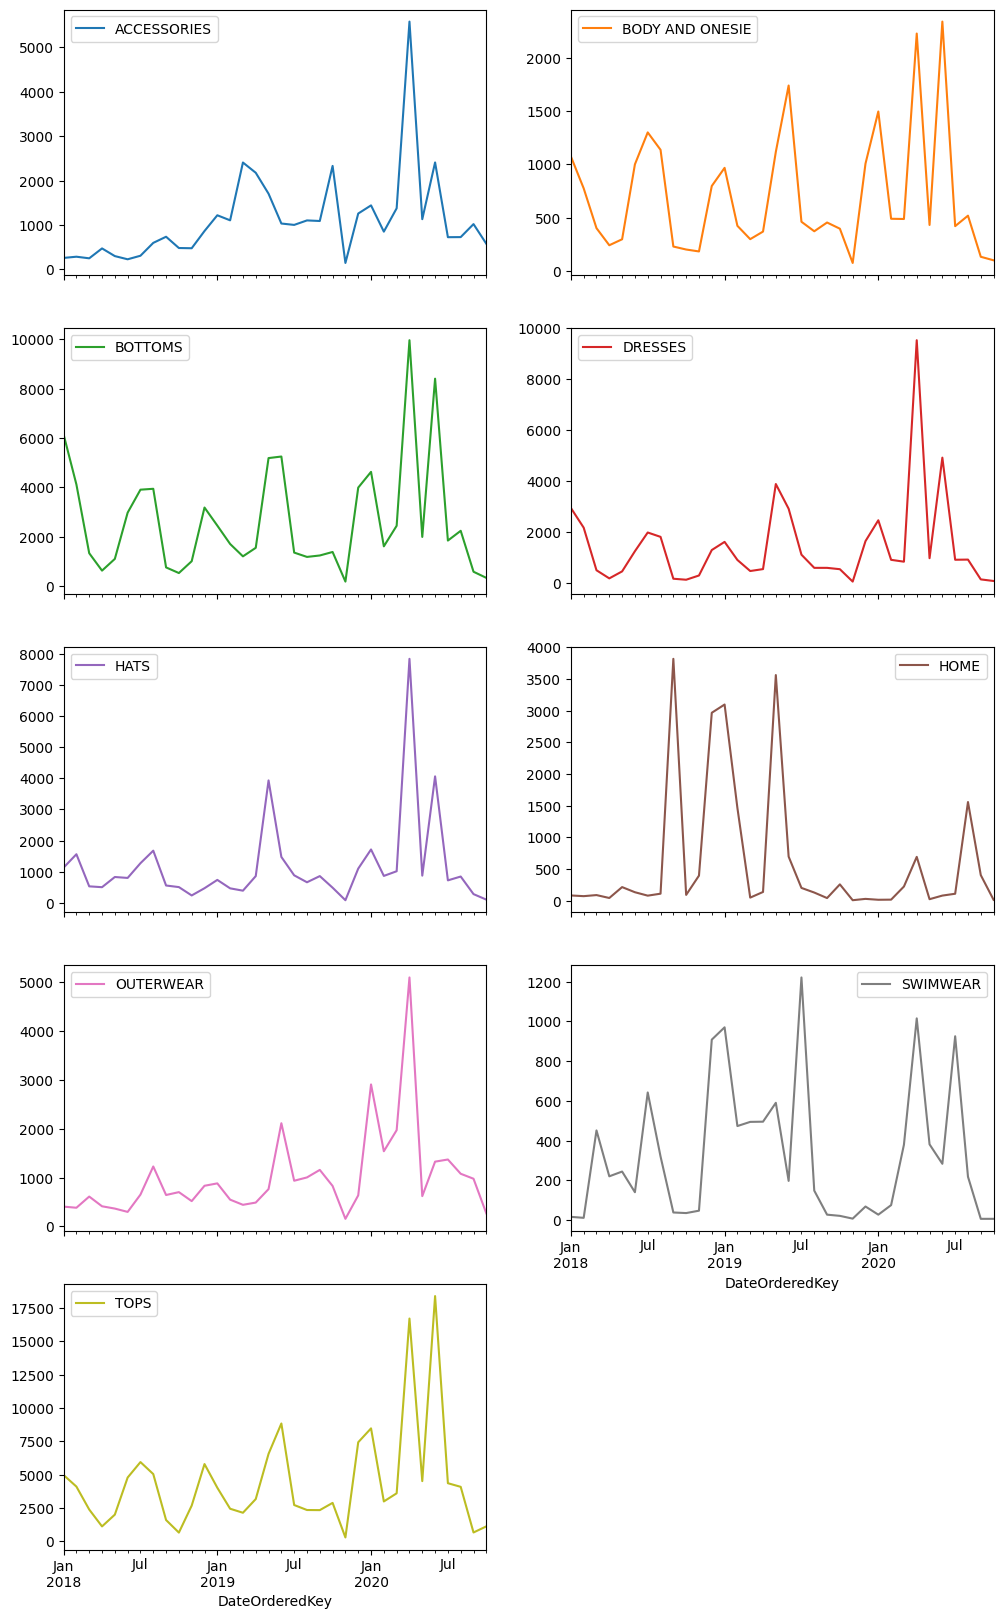

In [45]:
monthly_df.plot(subplots=True, figsize=(12, 20), layout=(-1, 2))
plt.show()



In [46]:
from statsmodels.tsa.stattools import adfuller
for group in monthly_df.columns:
  print(group)
  result = adfuller (monthly_df[group])
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ACCESSORIES
ADF Statistic: -4.569227
p-value: 0.000147
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616
BODY AND ONESIE
ADF Statistic: -5.331121
p-value: 0.000005
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616
BOTTOMS
ADF Statistic: -5.165469
p-value: 0.000010
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616
DRESSES
ADF Statistic: 1.033469
p-value: 0.994607
Critical Values:
	1%: -3.753
	5%: -2.998
	10%: -2.639
HATS
ADF Statistic: 1.076199
p-value: 0.995008
Critical Values:
	1%: -3.753
	5%: -2.998
	10%: -2.639
HOME
ADF Statistic: -2.937461
p-value: 0.041162
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633
OUTERWEAR
ADF Statistic: 2.985013
p-value: 1.000000
Critical Values:
	1%: -3.738
	5%: -2.992
	10%: -2.636
SWIMWEAR
ADF Statistic: -4.435791
p-value: 0.000256
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616
TOPS
ADF Statistic: -0.191016
p-value: 0.939584
Critical Values:
	1%: -3.738
	5%: -2.992
	10%: -2.636


ACCESSORIES
BODY AND ONESIE
BOTTOMS
DRESSES
HATS
HOME
OUTERWEAR
SWIMWEAR
TOPS


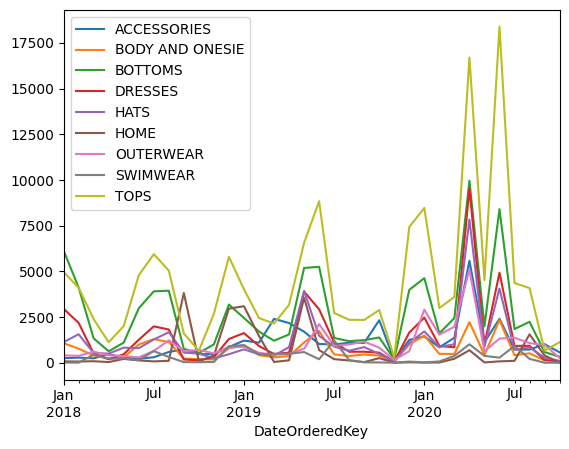

In [47]:
for group in monthly_df.columns:
  print(group)
  plt=monthly_df[group].plot()
  plt.legend()

ACCESSORIES
BODY AND ONESIE
BOTTOMS
DRESSES
HATS
HOME
OUTERWEAR
SWIMWEAR
TOPS


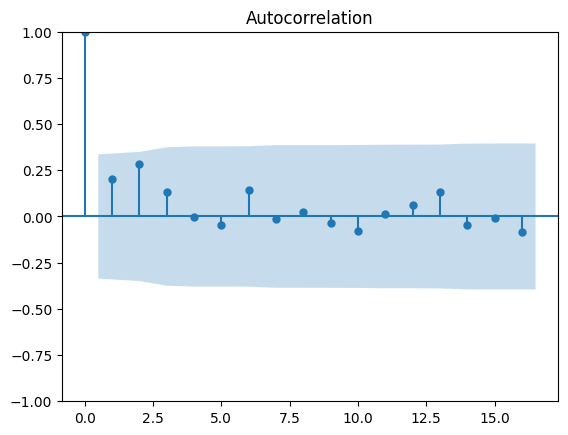

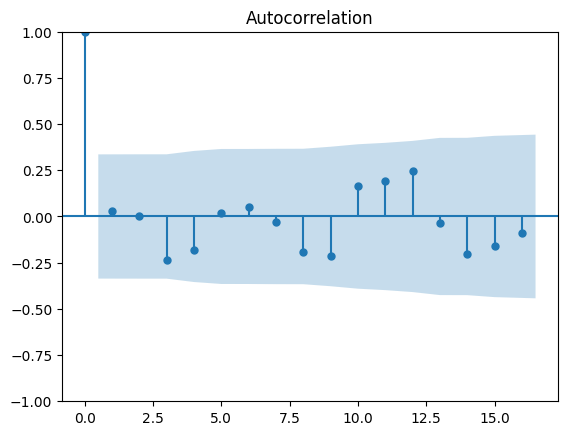

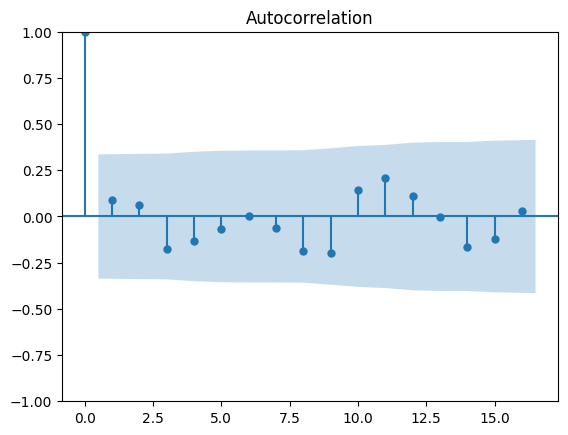

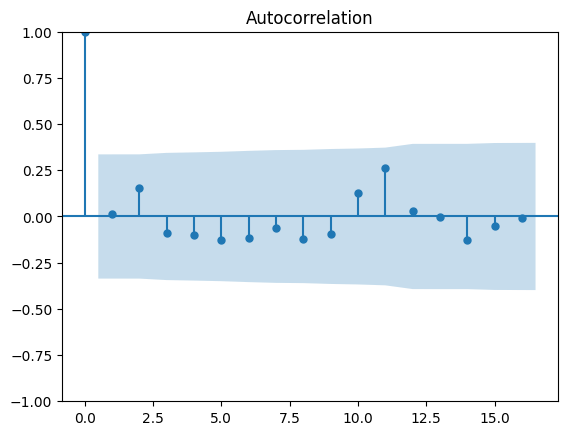

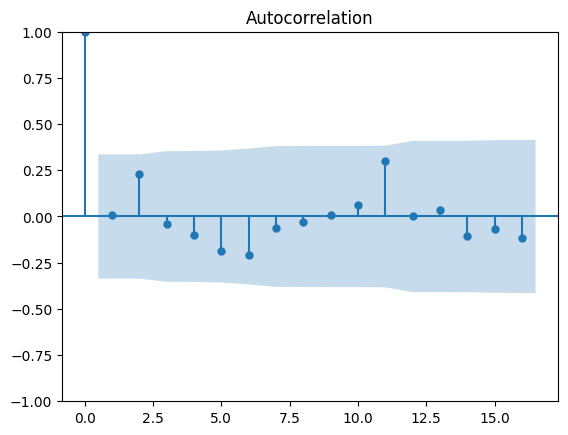

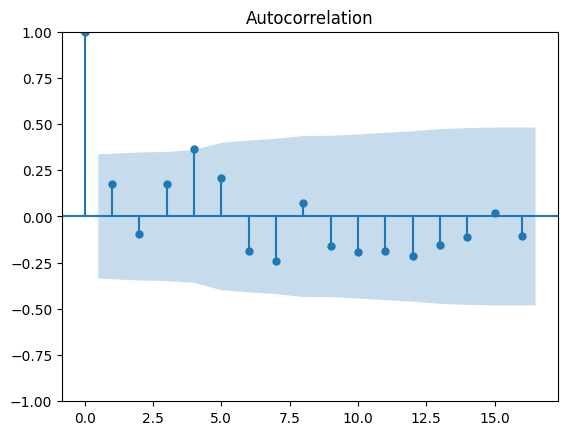

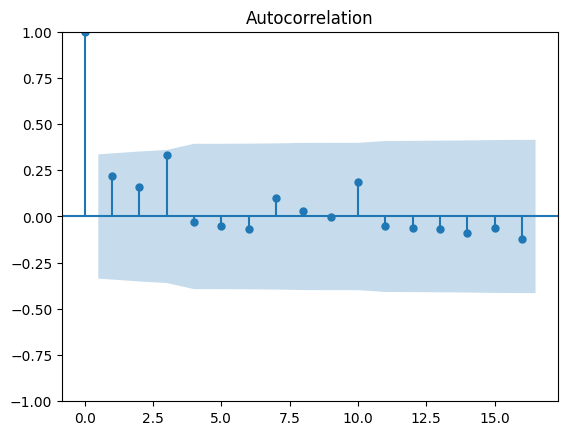

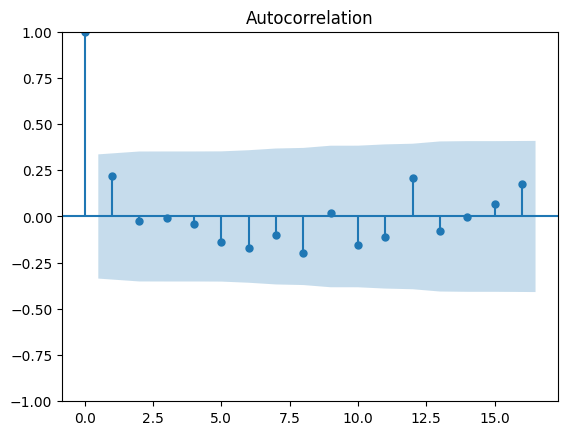

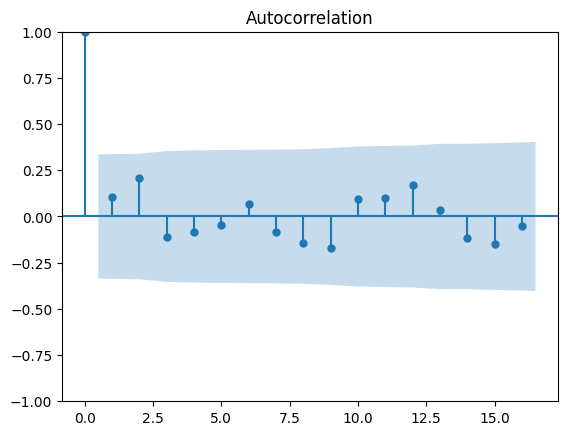

In [48]:
from statsmodels.graphics.tsaplots import plot_acf


for group in monthly_df.columns:
    group_df = monthly_df[[group]].resample('M').sum()
    print(group)
    plot_acf(group_df.values)

ACCESSORIES
BODY AND ONESIE
BOTTOMS
DRESSES
HATS
HOME
OUTERWEAR
SWIMWEAR
TOPS


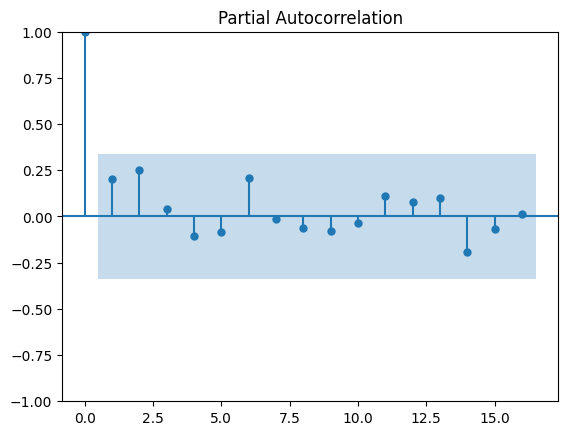

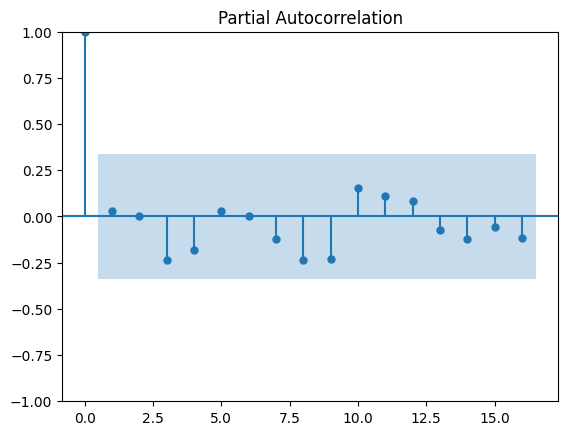

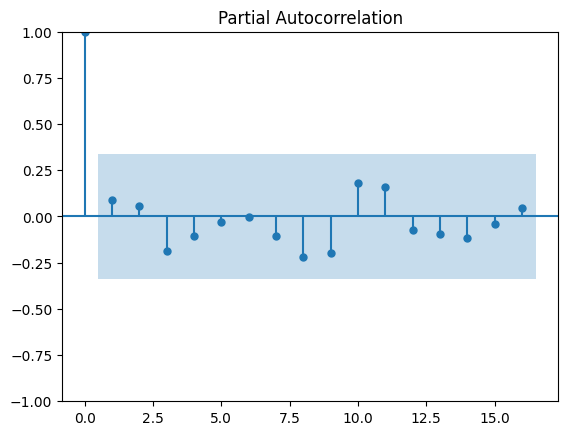

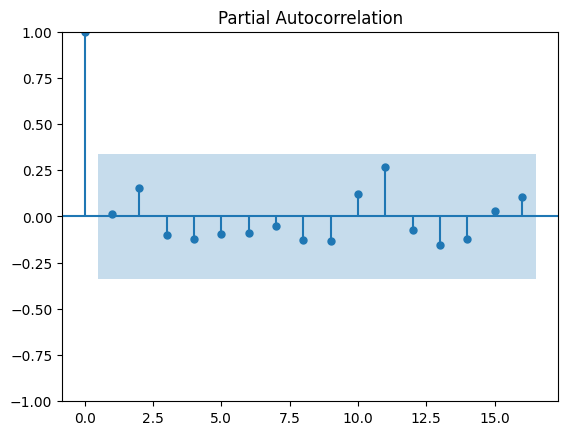

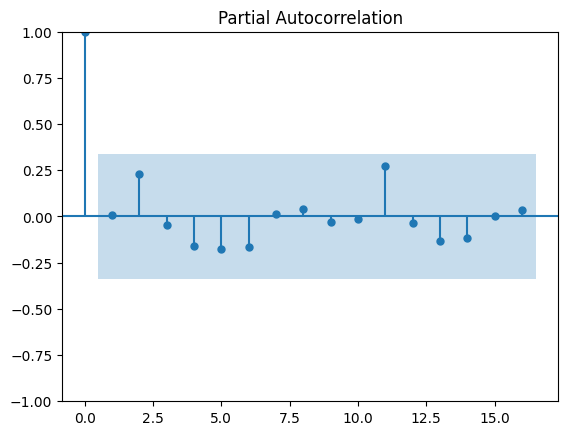

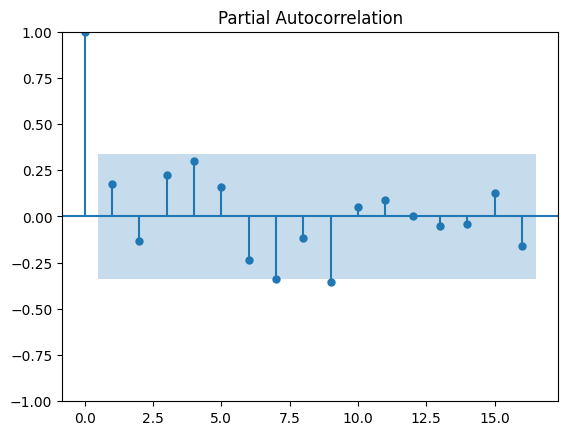

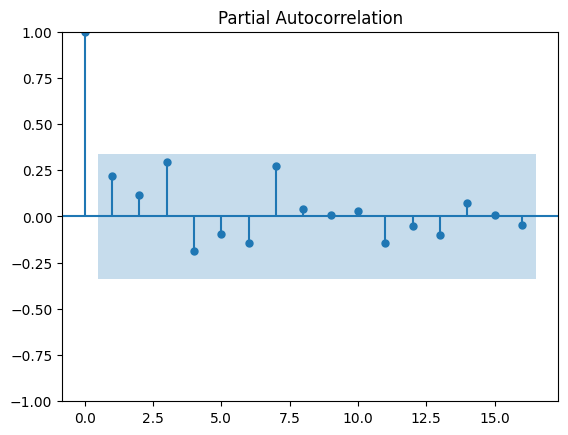

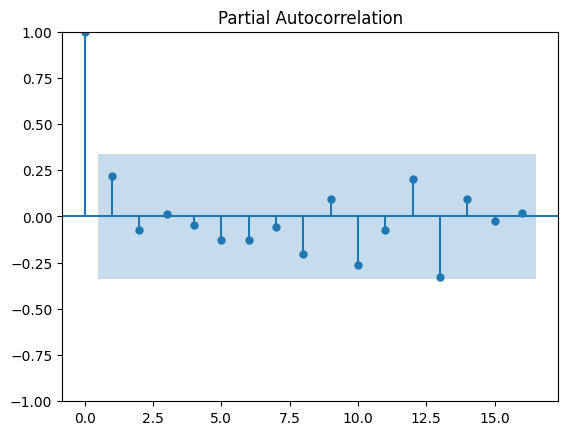

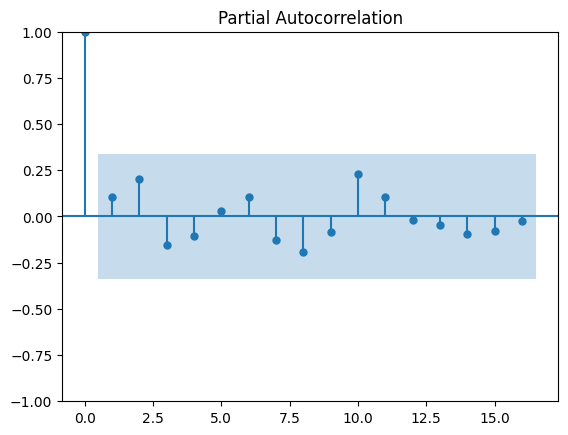

In [49]:
from statsmodels.graphics.tsaplots import plot_pacf


for group in monthly_df.columns:
    group_df = monthly_df[[group]].resample('M').sum()
    print(group)
    plot_pacf(group_df.values)

In [50]:
# Create a summary dataframe with the predicted values for each article group
summary_df = pd.DataFrame(index=monthly_df.columns, columns=['January','February', 'March', 'April', 'May', 'June','july',
                                                             'August' ,'September', 'October', 'November', 'December'])
for group in monthly_df.columns:
    group_df = monthly_df[[group]].resample('M').sum()
    train_data = group_df.loc[:'2019-12-31']
    test_data = group_df.loc['2019-12-31':]
    model = ARIMA(train_data, order=(1, 0, 1))
    fit_model = model.fit()
    steps = 365
    preds = fit_model.forecast(steps, exog=None, alpha=0.05)
    summary_df.loc[group] = [int(preds[0]), int(preds[1]), int(preds[2]), int(preds[3]), int(preds[4]),
                             int(preds[5]), int(preds[6]), int(preds[7]), int(preds[8]), int(preds[9]), int(preds[10]),int(preds[11])]

# Print the summary dataframe
print(summary_df)


                 January February March April   May  June  july August  \
ArticleGroupName                                                         
ACCESSORIES         1010      981   958   939   924   911   901    892   
BODY AND ONESIE      956      647   657   656   656   656   656    656   
BOTTOMS             4032     2550  2429  2419  2418  2418  2418   2418   
DRESSES             1530     1088  1218  1180  1191  1187  1188   1188   
HATS                1029      905   920   918   919   919   919    919   
HOME                 653      768   729   742   738   739   739    739   
OUTERWEAR            731      709   708   708   708   708   708    708   
SWIMWEAR             262      305   315   317   317   317   317    317   
TOPS                3178     3338  3434  3493  3528  3549  3562   3570   

                 September October November December  
ArticleGroupName                                      
ACCESSORIES            885     879      875      871  
BODY AND ONESIE     

In [51]:
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:                   TOPS   No. Observations:                   24
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -216.226
Date:                Tue, 05 Sep 2023   AIC                            440.451
Time:                        16:40:19   BIC                            445.164
Sample:                    01-31-2018   HQIC                           441.702
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3582.0420    121.735     29.425      0.000    3343.447    3820.637
ar.L1          0.6043      0.276      2.187      0.029       0.063       1.146
ma.L1         -0.9975      0.306     -3.263      0.0

In [90]:
# Fit the best model and make predictions
predicted_values = pd.DataFrame()
for column in monthly_df.columns:
    model = ARIMA(monthly_df[column], order=(1,0,1))
    model_fit = model.fit()
    predicted_values[column] = model_fit.predict(start=monthly_df.index[0], end=monthly_df.index[-1])

In [93]:
predicted_values.equals(monthly_df)

False

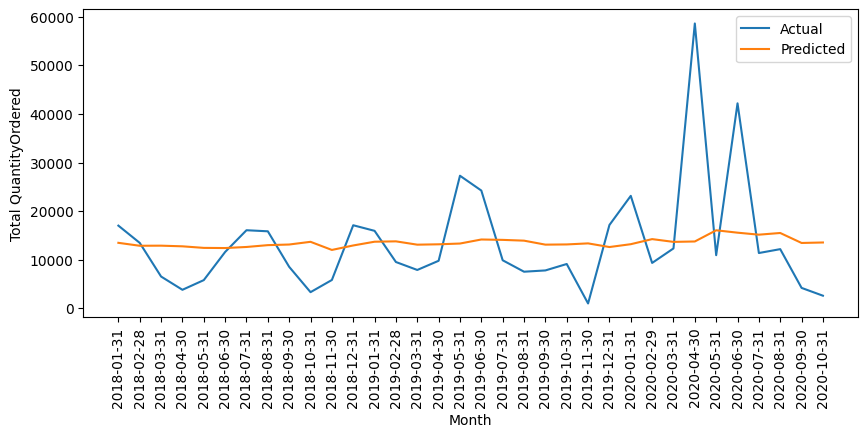

In [100]:
# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(monthly_df.index.astype(str), monthly_df.sum(axis=1), label='Actual')
plt.plot(predicted_values.index.astype(str), predicted_values.sum(axis=1), label='Predicted')
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('Total QuantityOrdered')
plt.legend()
plt.show()

In [99]:
print(predicted_values.sum())
print(monthly_df.sum())

ACCESSORIES         37549.989327
BODY AND ONESIE     23989.795711
BOTTOMS             90529.691362
DRESSES             50153.144700
HATS                40368.269402
HOME                20912.545022
OUTERWEAR           34348.825886
SWIMWEAR            11119.178134
TOPS               151838.543421
dtype: float64
ArticleGroupName
ACCESSORIES         37600.0
BODY AND ONESIE     23966.0
BOTTOMS             90437.0
DRESSES             50153.0
HATS                40354.0
HOME                20875.0
OUTERWEAR           34181.0
SWIMWEAR            11098.0
TOPS               151261.0
dtype: float64


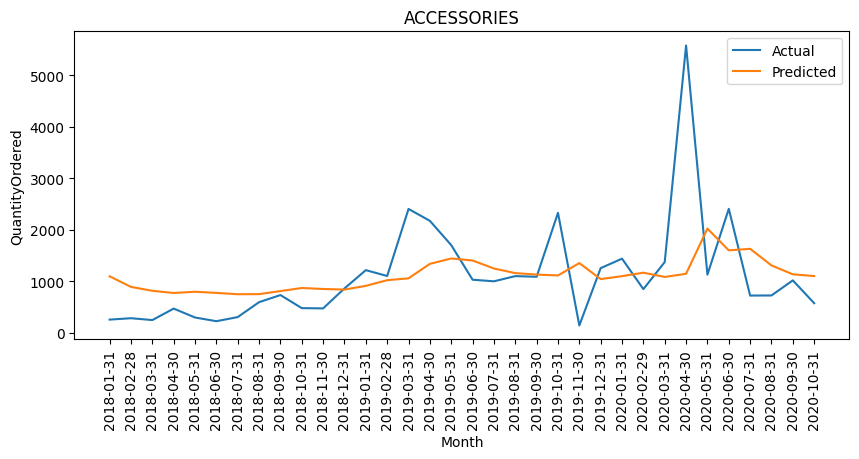

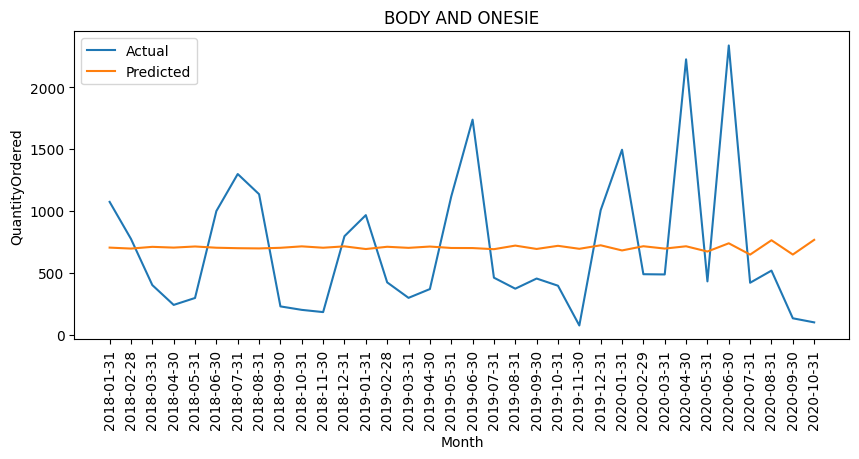

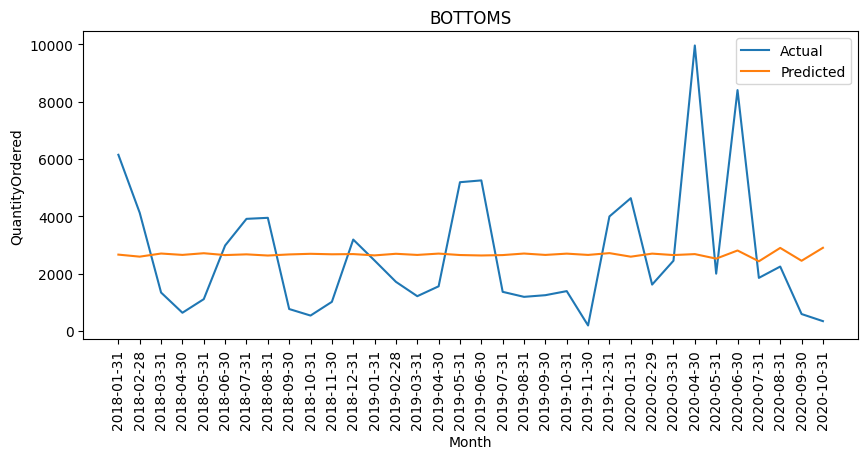

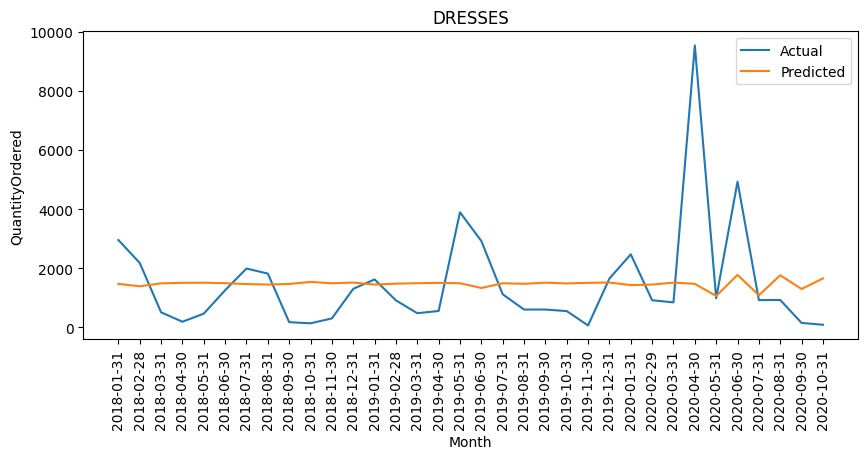

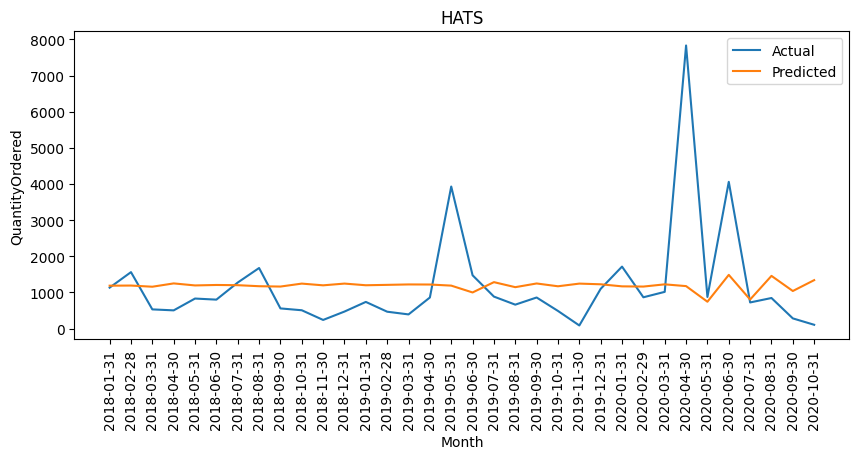

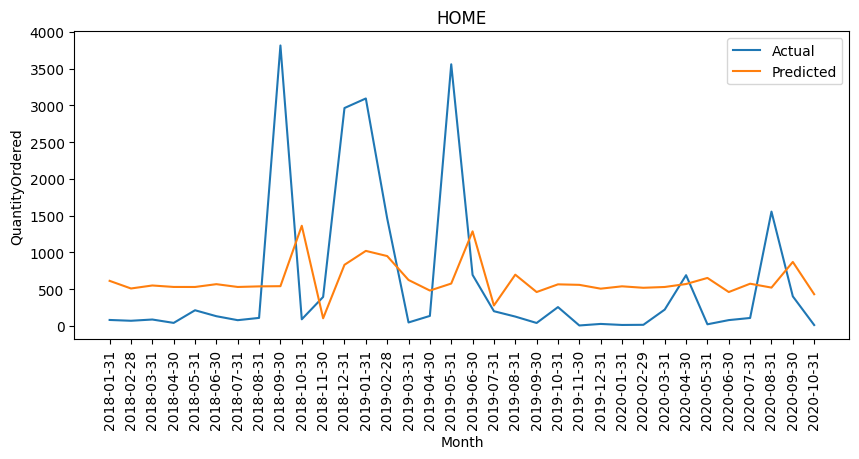

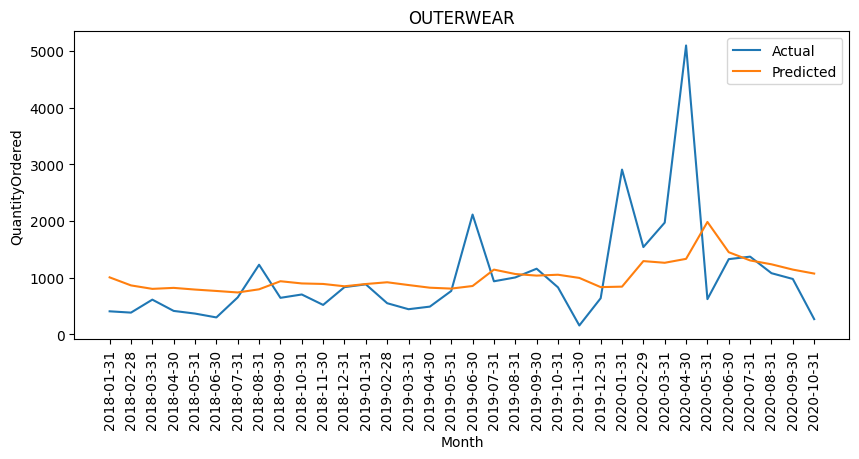

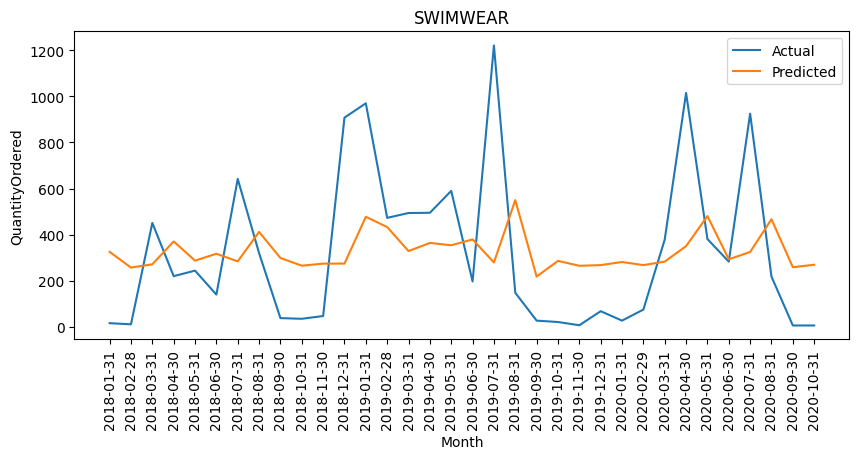

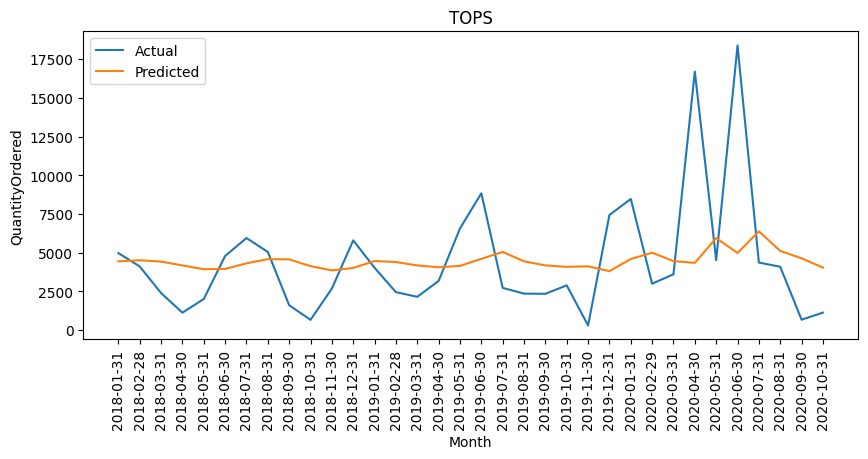

In [82]:
for group in monthly_df.columns:

  plt.figure(figsize=(10, 4))
  #results1 = DataFrame(monthly_df.index.astype(str), monthly_df.index.astype(str),{'Actual': monthly_df[[group]], 'Predicted': predicted_values[[group]]})
  #results1.plot()

  plt.plot(monthly_df.index.astype(str), monthly_df[[group]], label='Actual')
  plt.plot(predicted_values.index.astype(str), predicted_values[[group]], label='Predicted')

  plt.title(group)
  plt.xticks(rotation = 90)
  plt.xlabel('Month')
  plt.ylabel('QuantityOrdered')
  plt.legend()
  plt.show()

In [95]:
#Evaluation using statistical methodes
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mse_values=[]
rmse_values=[]
mae_values=[]
ape_values=[]
for column in monthly_df.columns:
    mse = mean_squared_error(monthly_df[column], predicted_values[column])
    mse_values.append(mse)
    mae = mean_absolute_error(monthly_df[column], predicted_values[column])
    mae_values.append(mae)
    model_mape =mean_absolute_percentage_error(monthly_df[column], predicted_values[column])


avg_mse = np.mean(mse_values)
rmse = np.sqrt(avg_mse)
avg_ape=np.mean(ape_values)
avg_mape=np.mean(avg_ape)/len(monthly_df)
avg_mae=np.mean(mae_values)
print("The MAPE of Arima Model",model_mape)
print("The MAE of Arima Model",avg_mae)
print("The MSE of Arima Model",avg_mse)
print("The RMSE of Arima Model",rmse)


The MAPE of Arima Model 1.3129928301858431
The MAE of Arima Model 998.3407852762753
The MSE of Arima Model 3148231.244554614
The RMSE of Arima Model 1774.3255745647737
